# Linear Transformations - Lab

## Introduction

In this lab, you'll practice your linear transformation skills!

## Objectives

You will be able to:

* Determine if a linear transformation would be useful for a specific model or set of data
* Identify an appropriate linear transformation technique for a specific model or set of data
* Apply linear transformations to independent and dependent variables in linear regression
* Interpret the coefficients of variables that have been transformed using a linear transformation

## Ames Housing Data

Let's look at the Ames Housing data, where each record represents a home sale:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

ames = pd.read_csv('ames.csv', index_col=0)
ames

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


We'll use this subset of features. These are specifically the _continuous numeric_ variables, which means that we'll hopefully have meaningful mean values.

From the data dictionary (`data_description.txt`):

```
LotArea: Lot size in square feet

MasVnrArea: Masonry veneer area in square feet

TotalBsmtSF: Total square feet of basement area

GrLivArea: Above grade (ground) living area square feet

GarageArea: Size of garage in square feet
```

In [2]:
ames = ames[[
    "LotArea",
    "MasVnrArea",
    "TotalBsmtSF",
    "GrLivArea",
    "GarageArea",
    "SalePrice"
]].copy()
ames

,LotArea,MasVnrArea,TotalBsmtSF,GrLivArea,GarageArea,SalePrice
Id,,,,,,
1,8450,196.0,856,1710,548,208500
2,9600,0.0,1262,1262,460,181500
3,11250,162.0,920,1786,608,223500
4,9550,0.0,756,1717,642,140000
5,14260,350.0,1145,2198,836,250000
...,...,...,...,...,...,...
1456,7917,0.0,953,1647,460,175000
1457,13175,119.0,1542,2073,500,210000
1458,9042,0.0,1152,2340,252,266500


We'll also drop any records with missing values for any of these features:

In [3]:
ames.dropna(inplace=True)
ames

,LotArea,MasVnrArea,TotalBsmtSF,GrLivArea,GarageArea,SalePrice
Id,,,,,,
1,8450,196.0,856,1710,548,208500
2,9600,0.0,1262,1262,460,181500
3,11250,162.0,920,1786,608,223500
4,9550,0.0,756,1717,642,140000
5,14260,350.0,1145,2198,836,250000
...,...,...,...,...,...,...
1456,7917,0.0,953,1647,460,175000
1457,13175,119.0,1542,2073,500,210000
1458,9042,0.0,1152,2340,252,266500


And plot the distributions of the un-transformed variables:

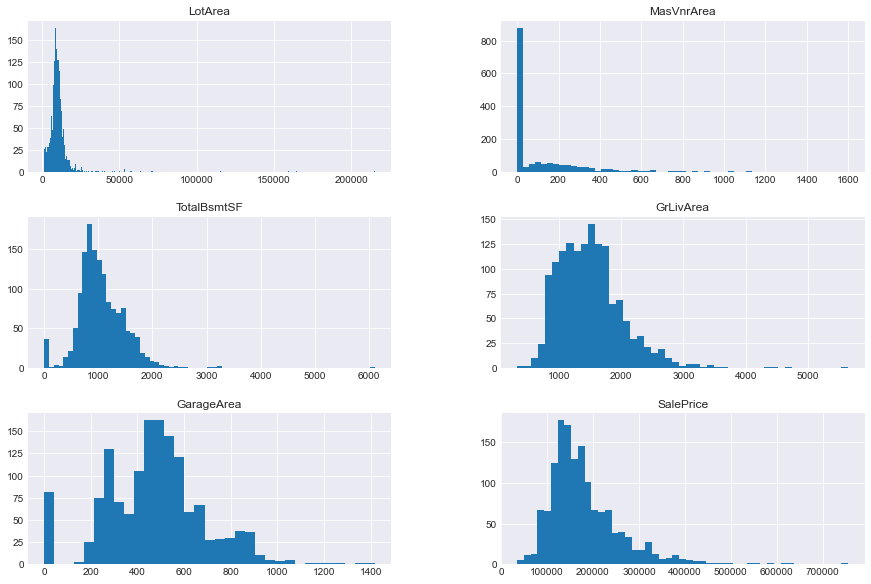

In [4]:
ames.hist(figsize=(15,10), bins="auto");

## Step 1: Build an Initial Linear Regression Model

`SalePrice` should be the target, and all other columns in `ames` should be predictors.

In [5]:
# Your code here - build a linear regression model with un-transformed features
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# Prepare the data (assuming 'ames' is already cleaned)
X = ames.drop(columns=['SalePrice'])
y = ames['SalePrice']

# Add a constant column for the intercept term in the regression model
X_with_intercept = sm.add_constant(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_with_intercept, y, test_size=0.2, random_state=42)

# Fit the linear regression model using statsmodels
model = sm.OLS(y_train, X_train).fit()

# Print the model summary to see coefficients, R-squared, and p-values
print(model.summary())

# Evaluate the model performance using R-squared and Mean Squared Error
y_pred = model.predict(X_test)

# Calculate the R-squared and MSE
r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"\nModel Evaluation:")
print(f"R-squared: {r_squared:.3f}")
print(f"Mean Squared Error: {mse:.2f}")


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     448.5
Date:                Fri, 15 Nov 2024   Prob (F-statistic):          1.42e-267
Time:                        15:23:54   Log-Likelihood:                -14122.
No. Observations:                1161   AIC:                         2.826e+04
Df Residuals:                    1155   BIC:                         2.829e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.081e+04   4776.326     -2.263      

## Step 2: Evaluate Initial Model and Interpret Coefficients

Describe the model performance overall and interpret the meaning of each predictor coefficient. Make sure to refer to the explanations of what each feature means from the data dictionary!

In [6]:
# Your written answer here
"""
The model overall is statistically significant and explains about 66% of the variance in sale price.

The coefficients are all statistically significant.

LotArea: for each additional square foot of lot area, the price increases by about $0.25
MasVnrArea: for each additional square foot of masonry veneer, the price increases by about $58
TotalBsmtSF: for each additional square foot of basement area, the price increases by about $40
GrLivArea: for each additional square foot of above-grade living area, the price increases by about $63
GarageArea: for each additional square foot of garage area, the price increases by about $96
"""

'\nThe model overall is statistically significant and explains about 66% of the variance in sale price.\n\nThe coefficients are all statistically significant.\n\nLotArea: for each additional square foot of lot area, the price increases by about $0.25\nMasVnrArea: for each additional square foot of masonry veneer, the price increases by about $58\nTotalBsmtSF: for each additional square foot of basement area, the price increases by about $40\nGrLivArea: for each additional square foot of above-grade living area, the price increases by about $63\nGarageArea: for each additional square foot of garage area, the price increases by about $96\n'

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

The model overall is statistically significant and explains about 68% of the variance in sale price.

The coefficients are all statistically significant.

* `LotArea`: for each additional square foot of lot area, the price increases by about \\$0.26
* `MasVnrArea`: for each additional square foot of masonry veneer, the price increases by about \\$55
* `TotalBsmtSF`: for each additional square foot of basement area, the price increases by about \\$44
* `GrLivArea`: for each additional square foot of above-grade living area, the price increases by about \\$64
* `GarageArea`: for each additional square foot of garage area, the price increases by about \\$93

</details>

## Step 3: Express Model Coefficients in Metric Units

Your stakeholder gets back to you and says this is great, but they are interested in metric units.

Specifically they would like to measure area in square meters rather than square feet.

Report the same coefficients, except using square meters. You can do this by building a new model, or by transforming just the coefficients.

The conversion you can use is **1 square foot = 0.092903 square meters**.

In [7]:
# Your code here - building a new model or transforming coefficients
# from initial model so that they are in square meters
# Conversion factor from square feet to square meters
sqft_to_m2 = 0.092903

# Coefficients from the model
coefficients_in_feet = {
    "LotArea": 0.2492,
    "MasVnrArea": 58.0481,
    "TotalBsmtSF": 39.9157,
    "GrLivArea": 62.6753,
    "GarageArea": 96.0066
}

# Convert the coefficients to square meters by multiplying with the conversion factor
coefficients_in_meters = {key: value * sqft_to_m2 for key, value in coefficients_in_feet.items()}

# Print the transformed coefficients
print("Coefficients in square meters:")
for feature, coef in coefficients_in_meters.items():
    print(f"{feature}: {coef:.2f}")


Coefficients in square meters:
LotArea: 0.02
MasVnrArea: 5.39
TotalBsmtSF: 3.71
GrLivArea: 5.82
GarageArea: 8.92


In [8]:
# Your written answer here
"""
LotArea: For each additional square meter of lot area, the price increases by about $0.02.
MasVnrArea: For each additional square meter of masonry veneer, the price increases by about $5.39.
TotalBsmtSF: For each additional square meter of basement area, the price increases by about $3.71.
GrLivArea: For each additional square meter of above-grade living area, the price increases by about $5.82.
GarageArea: For each additional square meter of garage area, the price increases by about $8.92.
"""

'\nLotArea: For each additional square meter of lot area, the price increases by about $0.02.\nMasVnrArea: For each additional square meter of masonry veneer, the price increases by about $5.39.\nTotalBsmtSF: For each additional square meter of basement area, the price increases by about $3.71.\nGrLivArea: For each additional square meter of above-grade living area, the price increases by about $5.82.\nGarageArea: For each additional square meter of garage area, the price increases by about $8.92.\n'

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

* `LotArea`: for each additional square meter of lot area, the price increases by about \\$2.76
* `MasVnrArea`: for each additional square meter of masonry veneer, the price increases by about \\$593
* `TotalBsmtArea`: for each additional square meter of basement area, the price increases by about \\$475
* `GrLivArea`: for each additional square meter of above-grade living area, the price increases by about \\$687
* `GarageArea`: for each additional square meter of garage area, the price increases by about \\$1,006

</details>

## Step 4: Center Data to Provide an Interpretable Intercept

Your stakeholder is happy with the metric results, but now they want to know what's happening with the intercept value. Negative \\$17k for a home with zeros across the board...what does that mean?

Center the data so that the mean is 0, fit a new model, and report on the new intercept.

(It doesn't matter whether you use data that was scaled to metric units or not. The intercept should be the same either way.)

In [9]:
# Your code here - center data
X_centered = X - X.mean()


In [10]:
# Your code here - build a new model
# Add a constant column for the intercept term
X_centered_with_intercept = sm.add_constant(X_centered)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_centered_with_intercept, y, test_size=0.2, random_state=42)

# Fit the linear regression model using statsmodels
model_centered = sm.OLS(y_train, X_train).fit()

# Print the new model summary
print(model_centered.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     448.5
Date:                Fri, 15 Nov 2024   Prob (F-statistic):          1.42e-267
Time:                        15:23:54   Log-Likelihood:                -14122.
No. Observations:                1161   AIC:                         2.826e+04
Df Residuals:                    1155   BIC:                         2.829e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.802e+05   1364.888    132.049      

In [11]:
# Your written answer here - interpret the new intercept
"""
The new intercept is about $180k. 
This means that a home with average lot area, average masonry veneer area, average total basement area, average above-grade living area, and average garage area would sell for about $180k.
"""

'\nThe new intercept is about $180k. \nThis means that a home with average lot area, average masonry veneer area, average total basement area, average above-grade living area, and average garage area would sell for about $180k.\n'

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

The new intercept is about \\$181k. This means that a home with average lot area, average masonry veneer area, average total basement area, average above-grade living area, and average garage area would sell for about \\$181k.

</details>

## Step 5: Identify the "Most Important" Feature

Finally, either build a new model with transformed coefficients or transform the coefficients from the Step 4 model so that the most important feature can be identified.

Even though all of the features are measured in area, they are different kinds of area (e.g. lot area vs. masonry veneer area) that are not directly comparable as-is. So apply **standardization** (dividing predictors by their standard deviations) and identify the feature with the highest standardized coefficient as the "most important".

In [12]:
# Your code here - building a new model or transforming coefficients
# from centered model so that they are in standard deviations

X_standardized = (X_centered) / X.std()

# Add a constant column for the intercept term
X_standardized_with_intercept = sm.add_constant(X_standardized)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_standardized_with_intercept, y, test_size=0.2, random_state=42)

# Fit the linear regression model using statsmodels
model_standardized = sm.OLS(y_train, X_train).fit()

# Print the new model summary
print(model_standardized.summary())

# Extract the standardized coefficients
standardized_coefficients = model_standardized.params[1:] 
most_important_feature = standardized_coefficients.abs().idxmax()

print(f"The most important feature is: {most_important_feature}")
print(f"Standardized coefficient of {most_important_feature}: {standardized_coefficients[most_important_feature]:.4f}")


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     448.5
Date:                Fri, 15 Nov 2024   Prob (F-statistic):          1.42e-267
Time:                        15:23:54   Log-Likelihood:                -14122.
No. Observations:                1161   AIC:                         2.826e+04
Df Residuals:                    1155   BIC:                         2.829e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.802e+05   1364.888    132.049      

In [13]:
# Your written answer here - identify the "most important" feature
"""
The feature with the highest standardized coefficient is GrLivArea. 
This means that above-grade living area is most important.
"""

'\nThe feature with the highest standardized coefficient is GrLivArea. \nThis means that above-grade living area is most important.\n'

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

The feature with the highest standardized coefficient is `GrLivArea`. This means that above-grade living area is most important.

</details>

## Summary
Great! You've now got some hands-on practice transforming data and interpreting the results!